## Feature Extraction: Blob Detection using Pillow and Scikit-image

In [4]:
import numpy as np
from PIL import Image, ImageOps, ImageDraw
import requests
from io import BytesIO
import matplotlib.pyplot as plt
from skimage.feature import blob_dog, blob_log, blob_doh

### Preprocessing

In [5]:
def fetch_image_from_url(url):
    """
    Fetches an image from the given URL.

    Args:
        url (str): URL of the image to fetch.

    Returns:
        Image: An Image object if successful, None otherwise.
    """
    try:
        response = requests.get(url)
        response.raise_for_status()
        return Image.open(BytesIO(response.content))
    except requests.RequestException as e:
        print(f"Error fetching image from URL: {e}")
        return None

def display_image(image, title="Image"):
    """
    Displays an image using matplotlib.

    Args:
        image (Image): The Image object to display.
        title (str): Title of the displayed image. Default is "Image".
    """
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

def convert_to_grayscale(image):
    """
    Converts an image to grayscale.

    Args:
        image (Image): The Image object to convert.

    Returns:
        Image: The converted grayscale Image object.
    """
    return ImageOps.grayscale(image)

def detect_blobs(image):
    """
    Detects blobs in a grayscale image using the Determinant of Hessian (DoH) method.

    Args:
        image (Image): The grayscale Image object to process.

    Returns:
        Image: The Image object with detected blobs marked.
    """
    image_np = np.array(image)
    blobs = blob_doh(image_np, max_sigma=30, threshold=.01)

    draw = ImageDraw.Draw(image)
    for blob in blobs:
        y, x, r = blob
        draw.ellipse((x-r, y-r, x+r, y+r), outline='red')
    return image



### Main

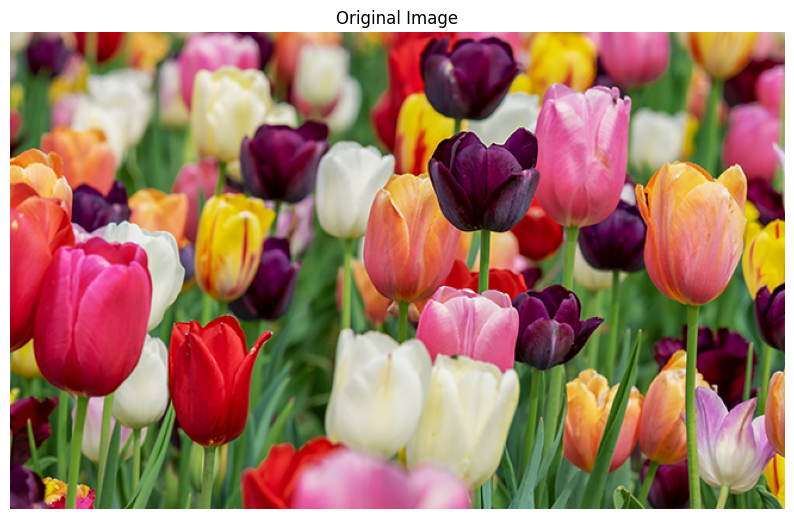

In [8]:
  # URL of the image to process
  # img_url = "https://www.countryflags.com/wp-content/uploads/brazil-flag-png-large.png"
  # img_url = "https://vcc2020.com/wp-content/uploads/2018/06/eye-colors.jpg"
  img_url = "https://jardinage.lemonde.fr/images/dossiers/2020-03/tulipe-135728.jpg" # Better insights

  """
  Fetch an image, convert it to grayscale, detect blobs,
  and display the original and processed images.

  Args:
      img_url (str): URL of the image to process.
  """
  image = fetch_image_from_url(img_url)
  if image is None:
      # return
      print("Failed to fetch the image. Exiting.")
      exit(1)

  display_image(image, "Original Image")


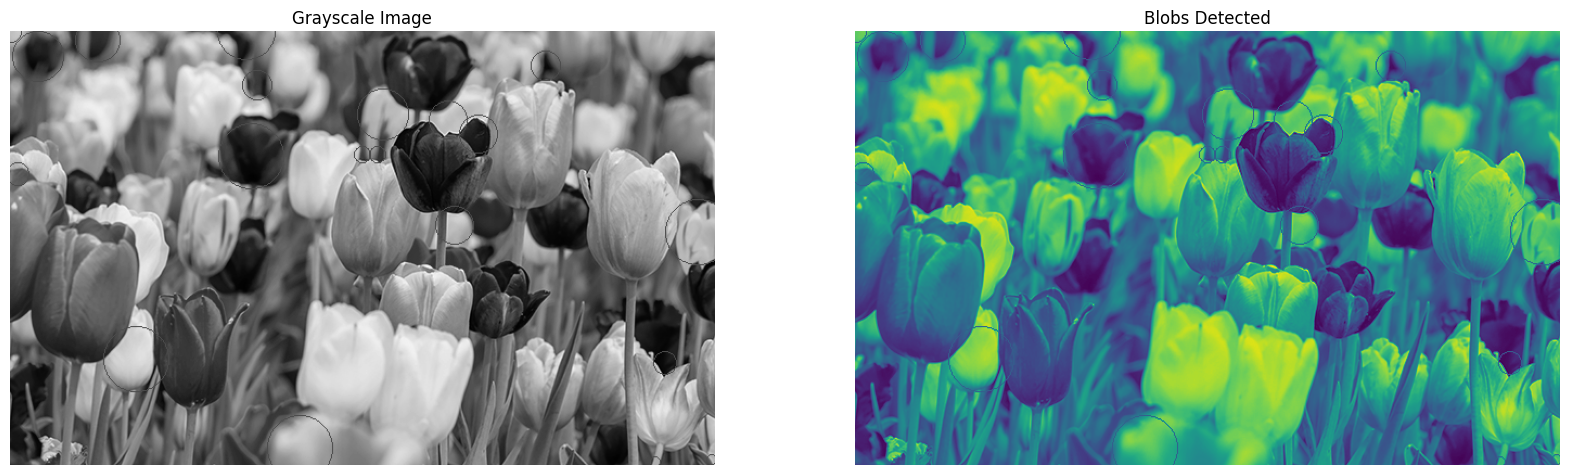

In [9]:

  gray_image = convert_to_grayscale(image)
  blobs_image = detect_blobs(gray_image)

  # Display the grayscale and blobs images
  plt.figure(figsize=(20, 10))

  plt.subplot(1, 2, 1)
  plt.imshow(gray_image, cmap='gray')
  plt.title("Grayscale Image")
  plt.axis('off')

  plt.subplot(1, 2, 2)
  plt.imshow(blobs_image)
  plt.title("Blobs Detected")
  plt.axis('off')

  plt.show()

## References
- https://en.wikipedia.org/wiki/Feature_(computer_vision)#Detectors